In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.

In [2]:
def get_the_furthest_point(set_of_points, the_point):
    """
    Находит точку из set_of_points наиболее удаленную от the_point.
    
    Args:
        set_of_points: ndarray(n, d) -- набор из n точек d-мерного пространства
        the_point: ndarray(d) -- еще одна точка d-мерного пространства
        
    Returns:
        the_furthest_point: ndarray(d) -- искомая точка
    """
    index = np.argmax(np.linalg.norm(set_of_points - the_point, axis=1))
    return set_of_points[index]

In [3]:
def smallest_enclosing_ball(points, x0=None, iters=10000):
    """
    Находит центр и радиус шара минимального радиуса,
    охватывающего все точки из points.
    
    Args:
        points: ndarray(n, d) -- набор из n точек d-мерного пространства,
                                 которые шар должен покрывать
        
    Returns:
        center: ndarray(d) -- координаты центра искомого шара
        radius: float -- радиус искомого шара
    """
    center = x0
    
    if x0 is None:
        center = points[0].copy()
    
    if len(points) == 1:
        return center, 0
    
    for _ in range(iters):
        furthest = get_the_furthest_point(points, center)
        center += (furthest - center) / iters
    
    radius = np.max(np.linalg.norm(points - center, axis=1))
    
    return center, radius

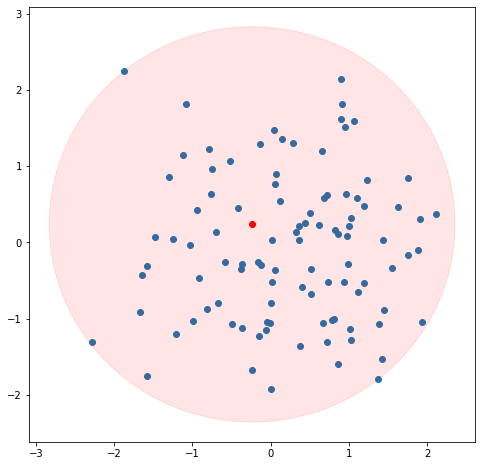

In [4]:
points = np.random.randn(100, 2)
center, radius = smallest_enclosing_ball(points, x0=np.mean(points, axis=0))

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(points.T[0], points.T[1])
plt.scatter(center[0], center[1], color='r')
ax.add_patch(plt.Circle(center, radius, alpha=0.1, color='r'))

plt.show()

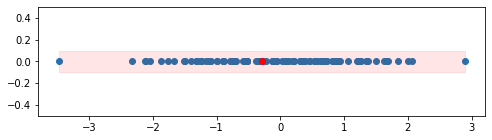

In [5]:
points = np.random.randn(100, 1)
center, radius = smallest_enclosing_ball(points)

fig, ax = plt.subplots(figsize=(8, 2))
plt.scatter(points.T[0], np.zeros_like(points.T[0]))
plt.scatter(center[0], 0, color='r')
plt.ylim(-0.5, 0.5)
ax.add_patch(plt.Rectangle([center[0] - radius, -0.1], 2*radius, 0.2, alpha=0.1, color='r'))

plt.show()